In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html
!pip install fastai
!curl http://course-v3.fast.ai/setup/colab | bash


Looking in links: https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0    867      0 --:--:-- --:--:-- --:--:--   865
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.15)
Already up to date.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [4]:
path = untar_data(URLs.PETS); path



PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_154.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_198.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_222.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_149.jpg')]

In [0]:
np.random.seed(2)

pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=16)

In [9]:
data.normalize(imagenet_stats)


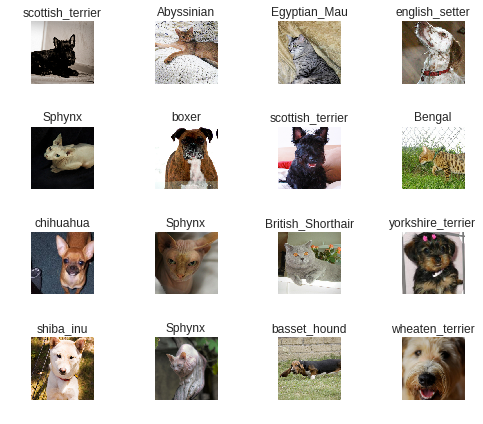

In [10]:
data.show_batch(rows=4,figsize=(7,6))

In [11]:
data.classes

['shiba_inu',
 'scottish_terrier',
 'Sphynx',
 'Bombay',
 'american_bulldog',
 'japanese_chin',
 'Birman',
 'leonberger',
 'beagle',
 'samoyed',
 'saint_bernard',
 'english_cocker_spaniel',
 'Bengal',
 'newfoundland',
 'basset_hound',
 'British_Shorthair',
 'wheaten_terrier',
 'Russian_Blue',
 'great_pyrenees',
 'Abyssinian',
 'german_shorthaired',
 'havanese',
 'Persian',
 'english_setter',
 'pug',
 'keeshond',
 'staffordshire_bull_terrier',
 'chihuahua',
 'Ragdoll',
 'yorkshire_terrier',
 'Siamese',
 'pomeranian',
 'miniature_pinscher',
 'american_pit_bull_terrier',
 'boxer',
 'Egyptian_Mau',
 'Maine_Coon']

Resnet 34

In [12]:
help(create_cnn)

Help on function create_cnn in module fastai.vision.learner:

create_cnn(data:fastai.basic_data.DataBunch, arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, **kwargs:Any) -> None
    Build convnet style learners.



In [0]:
learn = create_cnn(data,models.resnet34, metrics=[error_rate])

In [14]:
learn.fit_one_cycle(4)

Total time: 07:44
epoch  train_loss  valid_loss  accuracy
1      0.647954    0.292338    0.908849  (01:55)
2      0.581032    0.280885    0.907518  (01:55)
3      0.445606    0.233451    0.925482  (01:55)
4      0.315925    0.224288    0.929474  (01:57)



In [16]:
learn.fit_one_cycle(1)

Total time: 01:57
epoch  train_loss  valid_loss  error_rate
1      0.568636    0.269102    0.083832    (01:57)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [19]:
interp.confusion_matrix()

array([[41,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0, 47,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0, 35,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0, 33, ...,  0,  0,  0,  1],
       ...,
       [ 0,  0,  1,  0, ..., 31,  1,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 22,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 41,  1],
       [ 0,  0,  0,  0, ...,  0,  0,  0, 31]])

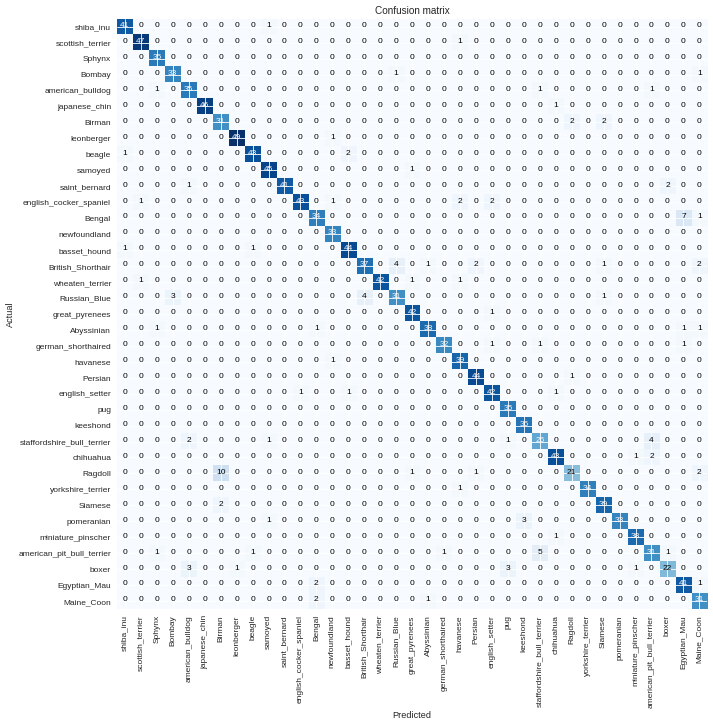

In [23]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

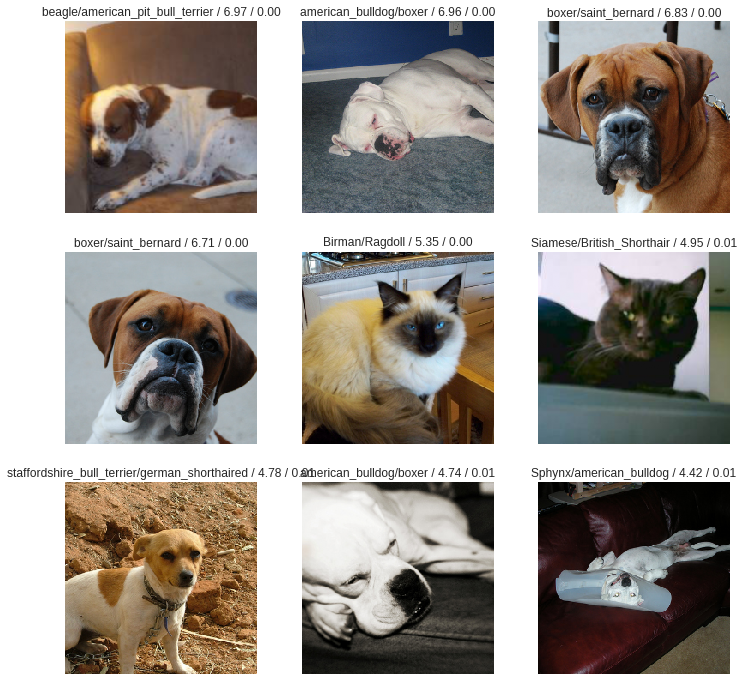

In [25]:
interp.plot_top_losses(9)

In [26]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('Bengal', 'Egyptian_Mau', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Russian_Blue', 'Bombay', 3),
 ('pomeranian', 'keeshond', 3),
 ('boxer', 'american_bulldog', 3),
 ('boxer', 'pug', 3)]

In [0]:
learn.unfreeze()

In [28]:
learn.fit_one_cycle(3)

Total time: 06:34
epoch  train_loss  valid_loss  error_rate
1      2.171295    3.492960    0.762475    (02:11)
2      1.383681    0.976139    0.309381    (02:11)
3      0.746212    0.470170    0.143713    (02:11)



In [0]:
learn.load('stage-1')

In [30]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


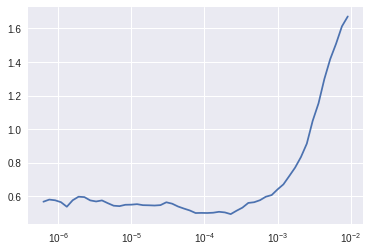

In [32]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))